In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('../data/diabetes.csv')

In [9]:
print("Dataset Shape:", df.shape)
print("\nColumns and Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Dataset Shape: (768, 9)

Columns and Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.0000

In [ ]:
# Check for missing or zero values
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)
    

C:\Users\USER\AppData\Local\Temp\ipykernel_17840\3469646849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


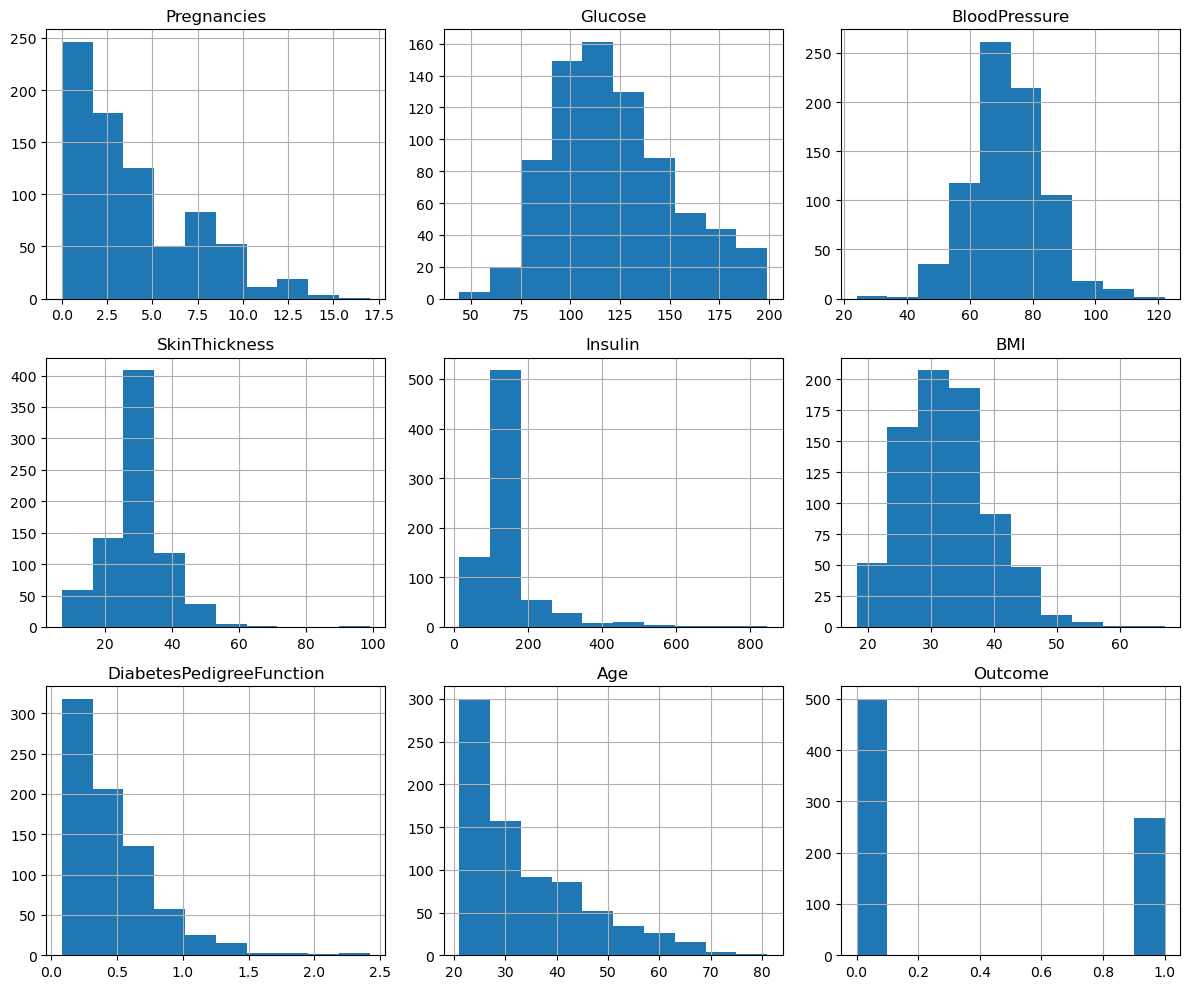

In [12]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('histograms.png')

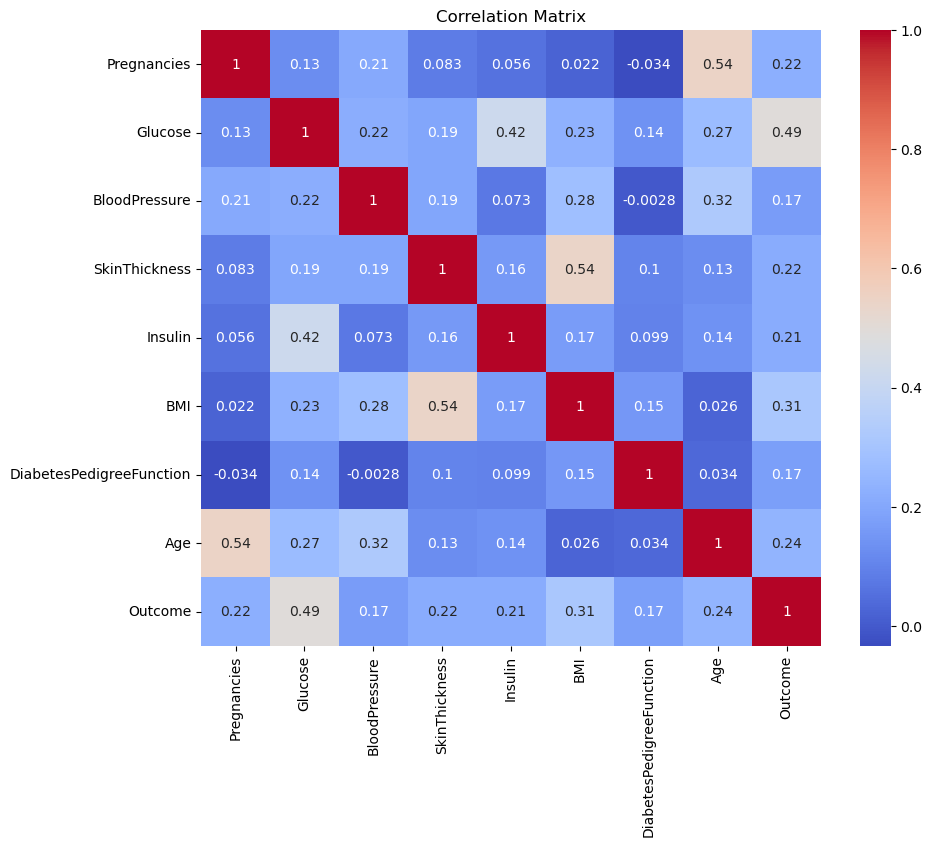

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

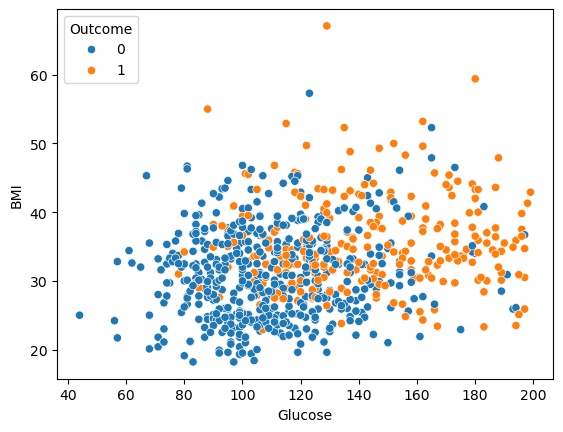

In [15]:
# Scatter plot
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.savefig('scatter_glucose_bmi.png')

In [16]:
# Feature scaling
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle

In [20]:
# Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

In [21]:
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", rf_cv_scores.mean())
print("Logistic Regression CV Accuracy:", lr_cv_scores.mean())

Random Forest CV Accuracy: 0.767093162734906
Logistic Regression CV Accuracy: 0.7655071304811408


In [22]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
models = {'Random Forest': rf, 'Logistic Regression': lr}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))


Random Forest Performance:
Accuracy: 0.7532467532467533
Precision: 0.6545454545454545
Recall: 0.6545454545454545
F1-Score: 0.6545454545454545

Logistic Regression Performance:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1-Score: 0.6415094339622641


In [31]:
best_model = rf  
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

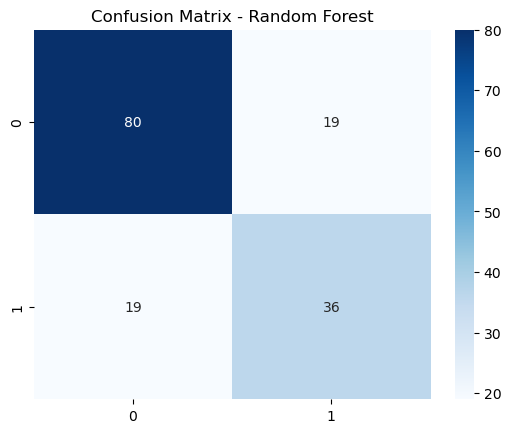

In [32]:
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.savefig('confusion_matrix.png')